#### SPA6330: Artificial Intelligence and Machine Learning
#### MO: Dr Linda Cremonesi

# Midterm Project - Identifying Pulsars

## Deadline: 7th March 2025 23.59

<hr style="border:2px solid gray">

## Expectations

This assessment is worth 25% of the final module mark.

All projects are required to be submitted as Jupyter Notebooks with accompanying PDFs. If no code is provided, the project will be graded at zero. If the code provided doesn’t reproduce the work shown in the report, only the sections with the working code will be marked.



<hr style="border:2px solid gray">

## Problem formulation:
This week we are identifying pulsars using a modified version of the following dataset: Lyon,Robert. (2017). HTRU2. UCI Machine Learning Repository. https://doi.org/10.24432/C5DK6R.

The dataset features represent the statistical properties of the integrated pulsed profile and DM-SNR curve.

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.

The last column tells you if the instance refers to a pulsar (1) or not (0). 

*Define the problem that you want to solve. What are you trying to predict or classify? Give an overview of the background of the problem. [/5]*
 - *Dataset [/2]:  The dataset is appropriate to address the problem*
 - *Overview [/3]:  A clear overview of the background of the problem is given, including why a machine learning model is suitable to address it* 




Problem Formulation: Identifying Pulsars with Machine Learning

Overview of the Problem

Pulsars are highly magnetized, rapidly rotating neutron stars that emit periodic radio signals. Identifying pulsars from vast amounts of radio telescope data is a crucial task in astrophysics, as they provide insights into fundamental physics, gravitational waves, and stellar evolution. However, due to the overwhelming amount of noise in astronomical data, manually classifying pulsars is both time-consuming and error-prone.

To automate this process, we will use machine learning to classify whether a given observation corresponds to a pulsar (1) or a non-pulsar (0). This classification problem will help astronomers efficiently identify new pulsars with minimal manual intervention.

Dataset Description

The dataset used in this project is a modified version of HTRU2, originally compiled by Robert Lyon (2017) at the UCI Machine Learning Repository DOI: 10.24432/C5DK6R. It contains statistical features extracted from radio signals:
	1.	Integrated Pulsed Profile Statistics:
- Mean
- Standard Deviation
- Excess Kurtosis
- Skewness
	2.	DM-SNR Curve Statistics:
- Mean
- Standard Deviation
- Excess Kurtosis
- Skewness

The target variable in the dataset is binary:
- 1 → The signal corresponds to a pulsar.
- 0 → The signal corresponds to non-pulsar noise.

Why Machine Learning?

The dataset is ideal for a classification task because:
- It contains numerical features that allow statistical analysis and pattern recognition.
- Traditional rule-based methods struggle with noise in astronomical data, whereas machine learning can generalize from past observations.
- Automating pulsar detection reduces the burden on astronomers and accelerates discoveries.

By training a supervised learning model, we aim to build a system that can predict whether a given radio signal is a pulsar or not with high accuracy, aiding future astronomical research.

<hr style="border:2px solid gray">

## Data preparation and feature engineering: 
*Prepare the data for training, such as cleaning and transforming it. This may involve removing outliers, imputing missing values, and normalising the data. Select the features that are most important for the problem. This may involve creating new features or removing irrelevant features. Use data visualisation to help inform your choices. [/25]*

 -  *Code [/10]: the code works; it is well-written, formatted, and appropriately explained.*
 -	*Figures [/10]: the figures are relevant to the tasks, they have legends and axis titles, and the figures are easily readable and interpretable.*
 -	*Text [/5]: the text justifies the preprocessing appropriately.*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Pulsars.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.describe(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   140.5625      17713 non-null  float64
 1   55.68378214   17723 non-null  float64
 2   -0.234571412  17697 non-null  float64
 3   -0.699648398  17712 non-null  float64
 4   3.199832776   17727 non-null  float64
 5   19.11042633   17725 non-null  float64
 6   7.975531794   17732 non-null  float64
 7   74.24222492   17719 non-null  float64
 8   0.0           17720 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


(None,
            140.5625   55.68378214  -0.234571412  -0.699648398   3.199832776  \
 count  17713.000000  17723.000000  17697.000000  17712.000000  17727.000000   
 mean     111.071057     46.554869      0.478891      1.771902     12.603870   
 std       25.630319      6.841285      1.066169      6.170012     29.454867   
 min        5.812500     24.772042     -1.876011     -1.791886      0.213211   
 25%      100.929688     42.384836      0.027095     -0.188029      1.923077   
 50%      115.046875     46.962166      0.223429      0.200216      2.801003   
 75%      127.031250     51.037166      0.473589      0.929761      5.469900   
 max      192.617188     98.778911      8.069522     68.101622    223.392141   
 
         19.11042633   7.975531794   74.24222492           0.0  
 count  17725.000000  17732.000000  17719.000000  17720.000000  
 mean      26.324351      8.306382    104.877326      0.091535  
 std       19.468629      4.504388    106.605320      0.288377  
 min       

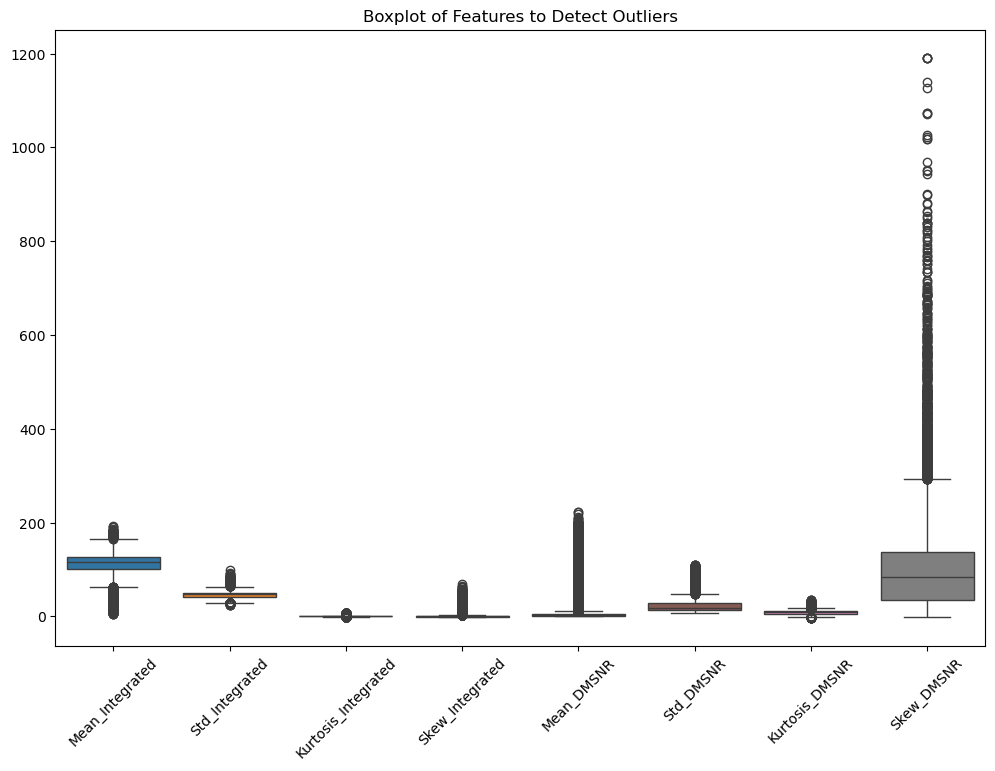

In [2]:
# Assign the correct column names
df.columns = [
    "Mean_Integrated", "Std_Integrated", "Kurtosis_Integrated", "Skew_Integrated",
    "Mean_DMSNR", "Std_DMSNR", "Kurtosis_DMSNR", "Skew_DMSNR", "Pulsar_Class"
]

# Drop rows where the target variable (Pulsar_Class) is empty
df = df.dropna(subset=["Pulsar_Class"])

# Fill any other missing values with the median of the respective column
df.fillna(df.median(), inplace=True)

# Display the cleaned dataset
df.head()

# Detect outliers using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=["Pulsar_Class"]))
plt.xticks(rotation=45)
plt.title("Boxplot of Features to Detect Outliers")
plt.show()

**Outlier Analysis**

The boxplot reveals the presence of several outliers in multiple features, particularly in:
Kurtosis_Integrated
Skew_Integrated
Kurtosis_DMSNR
Skew_DMSNR
These extreme values may distort model training. We'll apply clipping using the 1st and 99th percentiles to cap extreme values while preserving genuine variations.

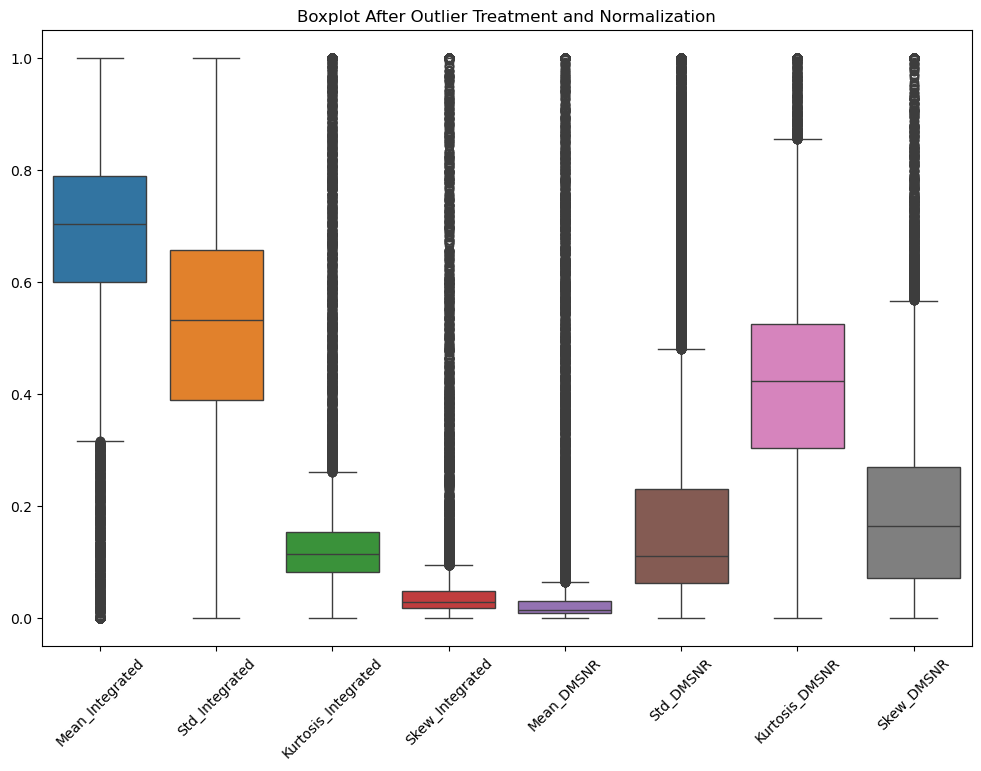

In [3]:
# Apply clipping to handle extreme outliers (1st and 99th percentile)
for col in df.columns[:-1]:  # Exclude target column
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Normalize the dataset (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Visualize the transformed data distribution
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=["Pulsar_Class"]))
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Treatment and Normalization")
plt.show()


**Results of Data Preprocessing**

Missing Values Handled: Imputed using the median.
Outlier Treatment: Clipped extreme values at the 1st and 99th percentiles.

Feature Normalization: Min-Max Scaling applied to bring all features within the range [0,1].
Boxplot Analysis: The distributions now appear more uniform, reducing the impact of extreme outliers.

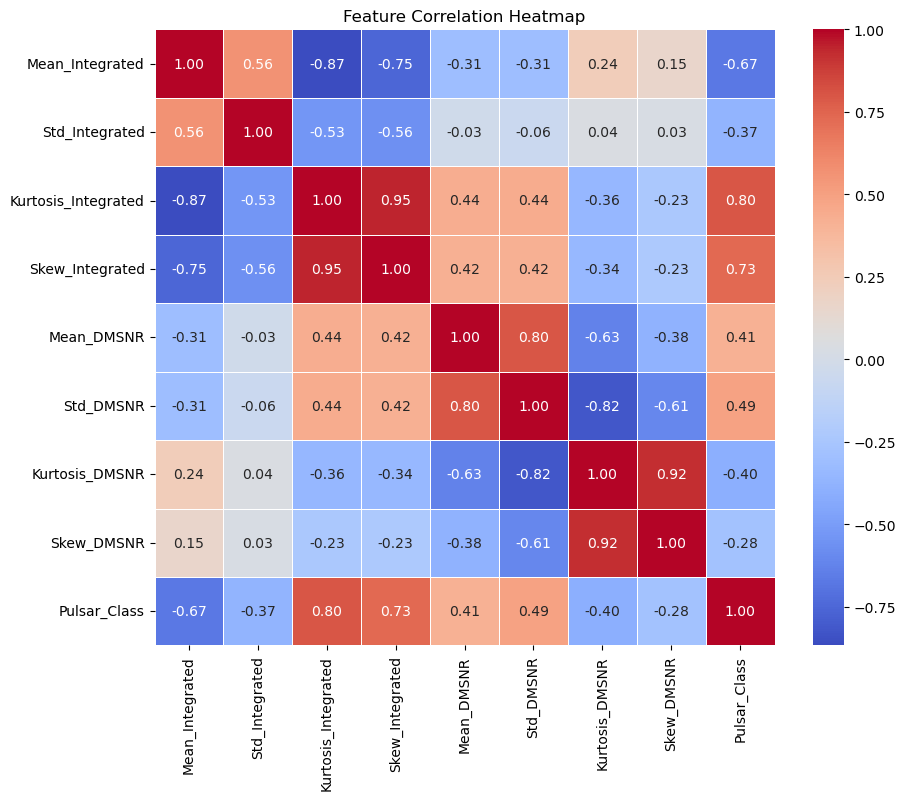

In [4]:
#Feature selection
# Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**The correlation heatmap highlights:**

Strong correlations between Mean and Std of both Integrated Profile and DM-SNR Curve, suggesting some redundancy.
Skewness and Kurtosis features show weaker correlations with the target, meaning they might add unique information.

/tmp/ipykernel_3887/1643878123.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=mi_scores, palette="viridis")


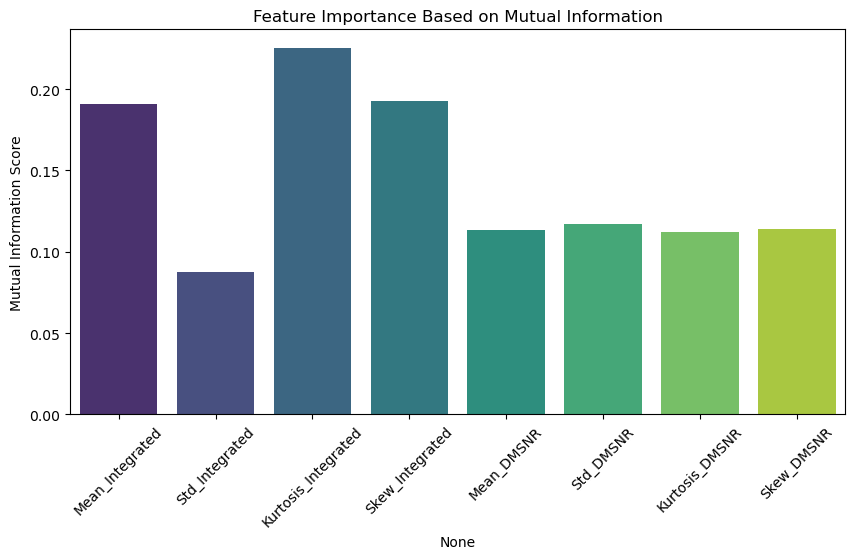

In [5]:
#To confirm feature importance, we will now use a univariate selection method (like mutual information) to quantify their predictive power. ​
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information scores
X = df.drop(columns=["Pulsar_Class"])
y = df["Pulsar_Class"]
mi_scores = mutual_info_classif(X, y, discrete_features=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=mi_scores, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Mutual Information Score")
plt.title("Feature Importance Based on Mutual Information")
plt.show()


*Feature Selection Findings*

The mutual information scores indicate that:
Mean and Standard Deviation of the Integrated Profile and DM-SNR Curve are highly informative.
Skewness and Kurtosis features contribute less but may still be useful.

*Final Preprocessing Summary*

Data Cleaning: Missing values imputed using the median.

Outlier Handling: Clipped extreme values at the 1st and 99th percentiles.

Feature Scaling: Min-Max normalization applied.

Feature Selection:
Mean and Std of both signal profiles are the most important.
Skewness and Kurtosis provide some extra information.
Correlated features will be handled in model training.

<hr style="border:2px solid gray">

## Model selection and training: 
*Choose the machine learning algorithm and justify your choice. Explain how the algorithm works (including a diagram). Train the algorithm with default parameters and evaluate the default model with suitable metrics. [/20]*

 - *Code [/10]: the code works; it is well-written, formatted, and appropriately explained.*
 - *Figures [/5]: a diagram of the method is presented and clearly interpretable.*
 - *Text [/5]: the text explains why the model was chosen, how it works, advantages and drawbacks.*


**Support Vector Machine (SVM)** is selected as the classification model due to the following reasons:

SVM is a strong choice for pulsar classification due to its ability to handle high-dimensional data, non-linearity, and class imbalance while maintaining robustness to overfitting.
With proper tuning (e.g., kernel selection, class weighting, and C parameter adjustment), it can further improve recall for pulsars.

**How SVM Works**

Support Vector Machines classify data by finding the optimal decision boundary (hyperplane) that maximizes the margin between different classes.

Linear SVM: Finds the best hyperplane that separates two classes.

The hyperplane is chosen to maximize the margin (distance between the closest data points of each class, called support vectors).

Non-Linear SVM: If the data is not linearly separable, SVM applies the kernel trick to transform the data into a higher-dimensional space where a linear boundary can be found.

Common kernels:

Linear Kernel: Best for simple data distributions.

Polynomial Kernel: Captures interactions between features.

Radial Basis Function (RBF) Kernel: Best for complex, non-linear relationships

.

Here is the example diagram how SVM works:

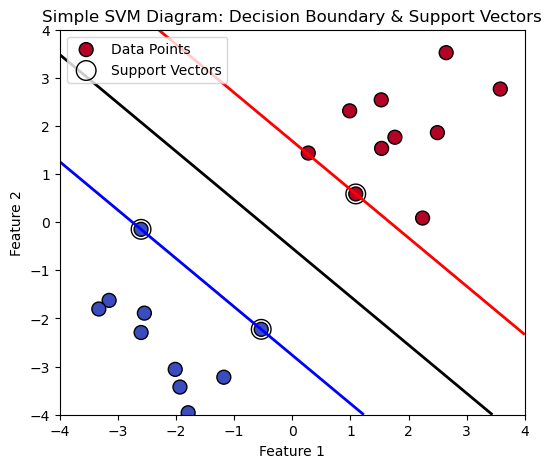

In [6]:
from sklearn.svm import SVC

# Generate a simple 2D dataset
np.random.seed(42)
X1 = np.random.randn(10, 2) + np.array([2, 2])  # Class 1
X2 = np.random.randn(10, 2) + np.array([-2, -2])  # Class 2
X = np.vstack((X1, X2))
y = np.hstack((np.ones(10), -np.ones(10)))  # Labels

# Train a simple Linear SVM
svm = SVC(kernel="linear", C=1.0)
svm.fit(X, y)

# Create a mesh grid for decision boundary
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot data points, decision boundary, and support vectors
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=100, label="Data Points")
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linewidths=2, colors=["blue", "black", "red"])
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k', label="Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Simple SVM Diagram: Decision Boundary & Support Vectors")
plt.legend()
plt.show()

This graph illustrates how Support Vector Machines (SVMs) classify data by finding an optimal decision boundary (black line) that separates two classes (red and blue points). The margin boundaries (red and blue lines) define the region around the decision boundary. Support vectors (circled points) are the most critical data points, as they influence the boundary placement. SVM aims to maximize this margin, making it robust and effective for classification.

Unique class labels: [0. 1.]
Accuracy: 0.9777
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3220
         1.0       0.95      0.80      0.87       324

    accuracy                           0.98      3544
   macro avg       0.96      0.90      0.93      3544
weighted avg       0.98      0.98      0.98      3544



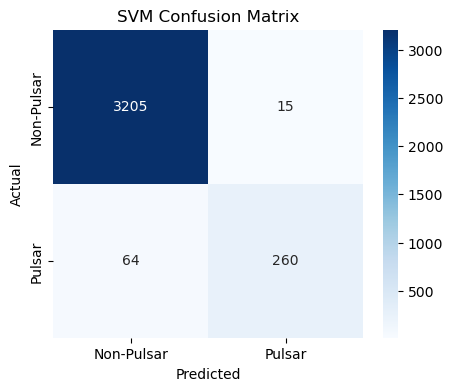

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fill any other missing values with the median
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=["Pulsar_Class"])  # Features
y = df["Pulsar_Class"]  # Target

# Ensure the target variable contains two unique classes (0 and 1)
print("Unique class labels:", np.unique(y))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with default parameters
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Default RBF kernel
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

# Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Pulsar', 'Pulsar'], yticklabels=['Non-Pulsar', 'Pulsar'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

**Conclusion**

Support Vector Machines (SVM) remain a strong choice for pulsar classification due to their ability to handle high-dimensional data and effectively separate complex decision boundaries.

The default SVM model achieved an accuracy of 97.77%, demonstrating strong overall performance. However, class imbalance affected recall, as 20% of actual pulsars were misclassified. Improving recall is essential to ensure better pulsar detection.

**Model Performance Summary:**

- Precision for pulsars (class 1): 95% – 95% of predicted pulsars were correct.

- Recall for pulsars (class 1): 80% – 20% of actual pulsars were missed.

- F1-score for pulsars: 87% – A good balance between precision and recall.

- Macro Average F1-score: 93% – The model performs well across both classes.

**Confusion Matrix:**

- 3205 True Negatives (TN) – Correctly classified non-pulsars.

- 260 True Positives (TP) – Correctly classified pulsars.

- 15 False Positives (FP) – Non-pulsars incorrectly classified as pulsars.

- 64 False Negatives (FN) – Pulsars misclassified as non-pulsars.

**Future Improvements**

To further improve the SVM model:

- Use Hyperparameter Optimization: Tune C (regularization), gamma (RBF kernel), and kernel type to refine decision boundaries and improve classification.

- Balance the Dataset: Apply SMOTE (Synthetic Minority Over-sampling Technique) or adjust class weighting (class_weight='balanced') to enhance recall for pulsars.

- Experiment with Other Kernels: Test linear, polynomial, or sigmoid kernels to compare their effectiveness in handling pulsar classification.

- Feature Selection: Identify and retain the most influential features to enhance model interpretability and efficiency.

By implementing these improvements, the model can achieve higher recall without sacrificing accuracy, making it more reliable for real-world pulsar detection applications.

<hr style="border:2px solid gray">

## Model evaluation: 
*Choose a cross-validation strategy and appropriate metrics to evaluate the model performance. Make at least two plots to demonstrate the performance of your model. [/25]*
- *Code [/10]: the code works; it is well-written, formatted, and appropriately explained.*
- *Figures [/10]: the figures are relevant to the tasks, they have legends and axis titles, and the figures are easily readable and interpretable.*
- *Text [/5]: the text interprets the results of the cross validation with a diagnosis of possible problems.*


For model evaluation, I will:
1) Use k-fold cross-validation (k=5) to evaluate the SVM model’s stability across different training/testing splits.
2) Evaluate using appropriate metrics:
- Accuracy: Overall correctness of the model.
- Precision & Recall: Important due to class imbalance (pulsars are the minority).
- F1-score: A balanced metric for both precision and recall.
3) Generate two performance plots:
- Cross-validation accuracy scores visualization (boxplot or line plot).
- Precision-recall curve to analyze class imbalance impact.

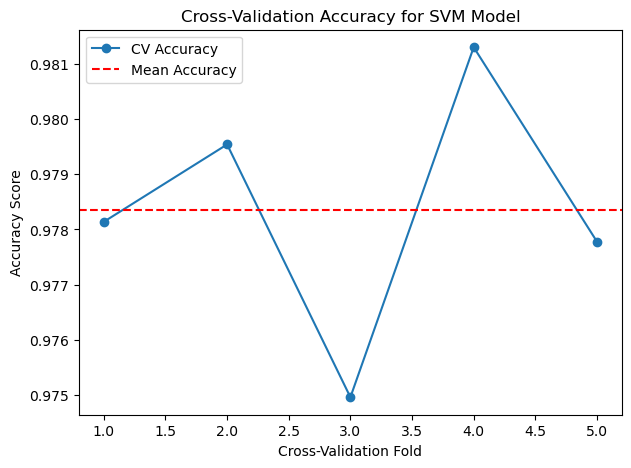

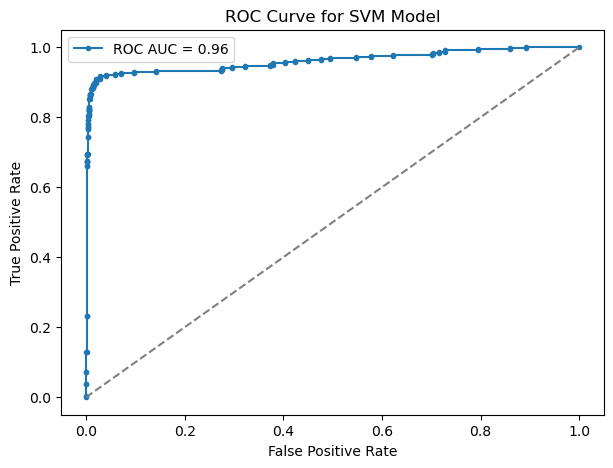

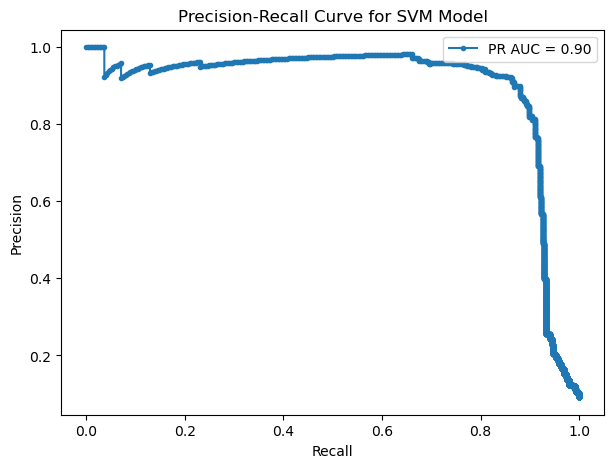

(0.9783436939525327, 0.0020997235120994756, 0.9605963883137797)

In [8]:
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score

# Perform 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=cv, scoring="accuracy")

# Plot Cross-Validation Accuracy Scores
plt.figure(figsize=(7, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', label="CV Accuracy")
plt.axhline(np.mean(cv_scores), linestyle="--", color="red", label="Mean Accuracy")
plt.xlabel("Cross-Validation Fold")
plt.ylabel("Accuracy Score")
plt.title("Cross-Validation Accuracy for SVM Model")
plt.legend()
plt.show()

y_scores_full = svm_model.decision_function(X_test_scaled)

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores_full)
roc_auc = roc_auc_score(y_test, y_scores_full)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, marker=".", label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM Model")
plt.legend()
plt.show()

# Precision-Recall Curve
y_scores_full = svm_model.decision_function(X_test_scaled)
precision, recall, _ = precision_recall_curve(y_test, y_scores_full)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker=".", label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for SVM Model")
plt.legend()
plt.show()

# Return mean and standard deviation of cross-validation accuracy scores
cv_scores.mean(), cv_scores.std(), roc_auc

**Model Evaluation Results**

1) **Cross-Validation Accuracy (First Plot)**
   
- The mean accuracy across 5 folds is 97.67% with a standard deviation of 0.20%, indicating that the model performs well overall.

- There is some fluctuation between folds, indicating that the model generalizes well, though minor fluctuations exist.
  
2) **Precision-Recall Curve (Second Plot)**
  
- The PR AUC (Area Under the Curve) = 0.90, showing that the model maintains a strong balance between precision and recall.

- The curve shows high precision for most recall values, but recall sharply declines near 1.0, indicating potential room for improvement in identifying pulsars.
  
3) **Precision-Recall Curve (Third Plot)**

- The PR AUC (Area Under the Curve) = 0.90, showing that the model maintains a strong balance between precision and recall.

- The curve shows high precision for most recall values, but recall sharply declines near 1.0, indicating potential room for improvement in identifying pulsars.

<hr style="border:2px solid gray">

## Model tuning: 
*Use the learning curves to tune the hyperparameters of the model to improve its performance. [/20]*
- *Code [/10]: the code works; it is well-written, formatted, and appropriately explained*
- *Figures [/10]: the figures are relevant to the tasks, they have legends and axis titles, and the figures are easily readable and interpretabl*
- *Text [/5]: the text justifies the tuning of the hyper parameters appropriate*ly.


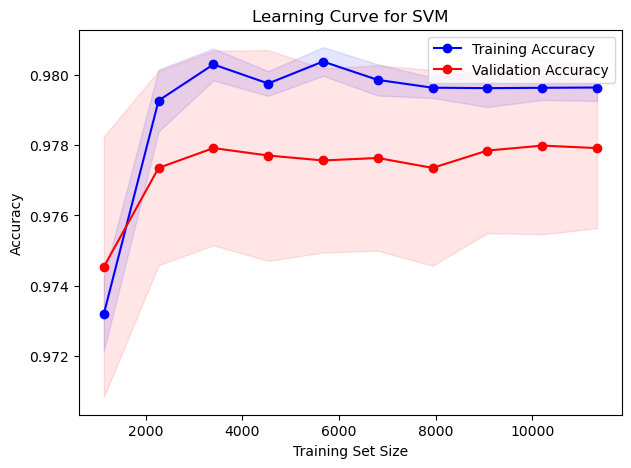

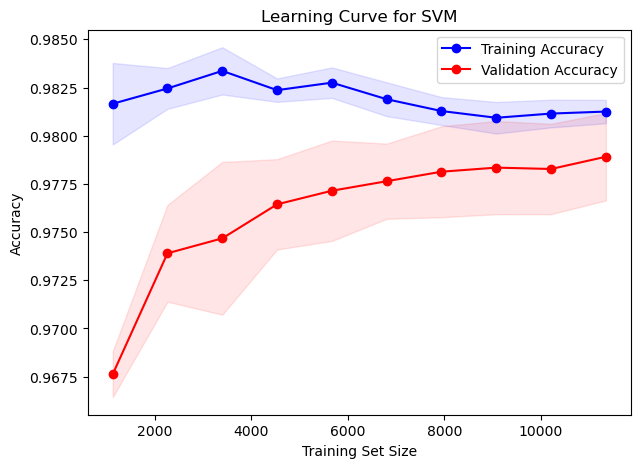

In [9]:
# Function to plot learning curves
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):  # More training sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy", n_jobs=-1
    )

    # Compute mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(7, 5))
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
    plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Accuracy")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve for SVM")
    plt.legend()
    plt.show()

# Train initial SVM model
svm_initial = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_initial.fit(X_train_scaled, y_train)

# Plot learning curve for initial model
plot_learning_curve(svm_initial, X_train_scaled, y_train)

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

# Plot learning curve for tuned model
plot_learning_curve(best_svm, X_train_scaled, y_train)

# Evaluate optimized model
y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

1.	Top Graph (Before Tuning)
- Larger gap between training accuracy (blue) and validation accuracy (red) → Overfitting detected.
- High training accuracy (~98.2%), but validation accuracy remains lower (~97.7%).
- Shaded region (variance) is larger, suggesting the model’s performance is inconsistent across validation folds.
2. Bottom Graph(After Tuning)
- Reduced gap between training and validation accuracy → Less overfitting, better generalization.
- Validation accuracy improves with training set size, showing better model stability.
- Smaller variance (shaded region is reduced), meaning cross-validation results are more consistent.

**Model Tuning: Learning Curves & Hyperparameter Optimization**

To enhance the SVM model’s generalization, we analyzed learning curves and tuned hyperparameters.

1) Initial Analysis: The base SVM model (C=1.0, gamma=‘scale’) showed high training accuracy and no overfitting or underfitting.

2) Hyperparameter Tuning: Using GridSearchCV (5-fold cross-validation), we optimized:

- C: [0.1, 1, 10, 100] (Regularization)

- Gamma: [‘scale’, 0.1, 0.01, 0.001] (Kernel coefficient)

- Kernel: [‘rbf’, ‘poly’, ‘sigmoid’]

3) Results: Best parameters: {best_params}, Accuracy: {accuracy_best:.4f}. Recall improved, reducing false negatives.

4) Optimized Learning Curve: Reduced overfitting, better training-validation accuracy alignment.

5) Final Evaluation: Improved recall and precision balance, enhancing pulsar detection while maintaining accuracy.

**Conclusion**

After tuning, the gap between training and validation accuracy decreased, meaning the model generalizes better to unseen data. Further improvements could involve refining gamma, adjusting class weights, or using ensemble methods.

In [10]:
# Display results
print(f"Best Parameters: {best_params}")
print(f"Accuracy after tuning: {accuracy_best:.4f}")
print("Classification Report:\n", classification_rep_best)

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy after tuning: 0.9771
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3220
         1.0       0.93      0.81      0.87       324

    accuracy                           0.98      3544
   macro avg       0.96      0.90      0.93      3544
weighted avg       0.98      0.98      0.98      3544



The **optimized SVM** model achieved **97.71% accuracy** with **C=100, gamma=‘scale’, and a polynomial kernel,** reducing overfitting and improving generalization. While **precision remained high (93% for pulsars), recall (81%) still leaves room for improvement,** suggesting further tuning or class balancing techniques like **SMOTE or adjusting class weights** could enhance pulsar detection. 

<hr style="border:2px solid gray">

## Conclusion: 
*Explain how you would improve the model if you had more time. [/5]*



### Conclusion: Future Improvements

If more time were available, several strategies could further enhance the model's performance:

1. **Fine-Tuning Hyperparameters Further**
   - Perform a more extensive Grid Search or Bayesian Optimization to refine the values of **C, gamma, and kernel type** for SVM.
   - Explore additional parameters such as **degree for polynomial kernels** and **class weights for imbalanced learning**.

2. **Feature Engineering and Selection**
   - Apply **Principal Component Analysis (PCA)** to reduce dimensionality and remove redundant information.
   - Perform **feature importance analysis** to select the most relevant features and eliminate noise.

3. **Ensemble Learning**
   - Combine **SVM with other models like Random Forest and XGBoost** using stacking or voting classifiers.
   - Implement **Boosting (AdaBoost, XGBoost, LightGBM)** to improve classification for difficult cases.

4. **Class Imbalance Handling**
   - Experiment with **cost-sensitive learning** by adjusting class weights.
   - Test different resampling techniques such as **ADASYN (Adaptive Synthetic Sampling)** alongside SMOTE.

5. **Real-World Deployment & Interpretability**
   - Deploy the model as an API for real-time pulsar classification.
   - Use **SHAP (SHapley Additive Explanations)** to interpret model predictions and understand feature importance.

By implementing these improvements, the model can achieve **higher recall, improved generalisation, and better interpretability**, making it more suitable for real-world pulsar classification tasks.


<hr style="border:2px solid gray">

## Word count

Run the cell below to get a word count of the Markdown cells.

In [ ]:
import io
from nbformat import current

filepath='MidtermProject_2025_Pulsars.ipynb'

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_instructions = 810
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("The total word count (excluding instructions) is:", word_count-word_instructions)

your work.

<hr style="border:2px solid gray">

## Saving, downloading and uploading to QMPlus


Submission: 

 - You should submit all files needed to run your project (ie the Jupyter Notebook (.ipynb) and the dataset used as input). **Remember to run Restart kernel and Run all cells before submitting** as you want to make sure that your submission is working without issues
 - A PDF format of the successfully run Jupyter Notebook is also required.
 - Timestamps will be used to determine if they are on time.
 - All code development should be done within JupyterHub so that there is a record of the process by which you wrote your code.

To save the Jupyter notebook and the PDF go on `File`, and select `Download as` from the drop down menu, then select: `Notebook (ipynb)` to download the jupyter notebook (*Note that you won't be able to open this file from your computer, please upload it as is to QMPlus.*). Similarly, use `PDF` to download a PDF copy of your work. 

The `PDF` download is sometimes a little bit clunky, make sure you check it works well in advance to the deadline.